## Question:

Providing a dataset of employees working in ABC company. It consists of 458 rows and 9 columns. The company needs the detailed report and explanation of their employees in each team, also need to identify the following:

1.How many are there in each Team and the percentage splitting with respect to the total employ
es. 2.Segregate the employees w.r.t different positi
ns. 3.Find from which age group most of the employees belong 
to. 4.Find out under which team and position, spending in terms of salary is h
gh. 5.Find if there is any correlation between age and salary , represent it visually.

Before doing the above questions,perform pre processing of the dataset. Also, the column height is having incorrect data, changing the data of that particular column with any random numbers between 150 and 180.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('myexcel - myexcel.csv.csv')
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


### Pre processing of the Dataset.

In [5]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [6]:
df.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0
457,Priyanka,Utah Jazz,34,C,25,07-Mar,231,Kansas,947276.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [8]:
df.describe()

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.226620e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [9]:
df.describe(include='all')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
count,458,458,458.000000,458,458.000000,458,458.000000,374,4.470000e+02
unique,458,30,NaN,5,NaN,18,NaN,118,NaN
top,Avery Bradley,New Orleans Pelicans,NaN,SG,NaN,06-Sep,NaN,Kentucky,NaN
freq,1,19,NaN,102,NaN,59,NaN,22,NaN
mean,NaN,NaN,17.713974,NaN,26.934498,NaN,221.543668,NaN,4.833970e+06
std,NaN,NaN,15.966837,NaN,4.400128,NaN,26.343200,NaN,5.226620e+06
min,NaN,NaN,0.000000,NaN,19.000000,NaN,161.000000,NaN,3.088800e+04
25%,NaN,NaN,5.000000,NaN,24.000000,NaN,200.000000,NaN,1.025210e+06
50%,NaN,NaN,13.000000,NaN,26.000000,NaN,220.000000,NaN,2.836186e+06
75%,NaN,NaN,25.000000,NaN,30.000000,NaN,240.000000,NaN,6.500000e+06


In [11]:
df.isnull()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
453,False,False,False,False,False,False,False,False,False
454,False,False,False,False,False,False,False,True,False
455,False,False,False,False,False,False,False,True,False
456,False,False,False,False,False,False,False,False,False


In [13]:
df.isna()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
453,False,False,False,False,False,False,False,False,False
454,False,False,False,False,False,False,False,True,False
455,False,False,False,False,False,False,False,True,False
456,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [20]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

### Changing the data of HEIGHT column with any random numbers between 150 and 180.

In [22]:
df['Height']=np.random.randint(150,181,size=len(df))
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,164,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,161,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,180,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,161,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,157,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,157,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,179,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,179,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,171,231,Kansas,947276.0


### 1.How many are there in each Team and the percentage splitting with respect to the total employees

In [26]:
Total=df['Team'].value_counts()
Total

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

In [27]:
Percent=(Total/len(df))*100
Percent

Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

### 2.Segregate the employees w.r.t different positions.

In [69]:
df['Position'].value_counts()

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

In [74]:
segregate=df.groupby('Position')['Name']
list(segregate)

[('C',
  7         Kelly Olynyk
  10     Jared Sullinger
  14        Tyler Zeller
  23         Brook Lopez
  27          Henry Sims
              ...       
  439      Mason Plumlee
  447        Rudy Gobert
  455       Tibor Pleiss
  456        Jeff Withey
  457           Priyanka
  Name: Name, Length: 79, dtype: object),
 ('PF',
  4         Jonas Jerebko
  5          Amir Johnson
  6         Jordan Mickey
  24     Chris McCullough
  25          Willie Reed
               ...       
  435      Meyers Leonard
  441         Noah Vonleh
  442       Trevor Booker
  446      Derrick Favors
  452          Trey Lyles
  Name: Name, Length: 100, dtype: object),
 ('PG',
  0      Avery Bradley
  8       Terry Rozier
  9       Marcus Smart
  11     Isaiah Thomas
  19      Jarrett Jack
             ...      
  440    Brian Roberts
  443       Trey Burke
  445       Dante Exum
  453     Shelvin Mack
  454        Raul Neto
  Name: Name, Length: 92, dtype: object),
 ('SF',
  1                 Jae Crow

### 3.Find from which age group most of the employees belong to.

In [30]:
df['Age'].value_counts()

Age
24    47
25    46
27    41
23    41
26    36
28    31
30    31
29    28
22    26
31    22
20    19
21    19
33    14
32    13
34    10
36    10
35     9
37     4
38     4
40     3
39     2
19     2
Name: count, dtype: int64

In [35]:
AgeGroup=pd.cut(df['Age'],bins=[0,5,10,15,20,25,30,35,40,45,50],labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50'])
print(AgeGroup)

0      20-25
1      20-25
2      25-30
3      20-25
4      25-30
       ...  
453    25-30
454    20-25
455    25-30
456    25-30
457    20-25
Name: Age, Length: 458, dtype: category
Categories (10, object): ['0-5' < '5-10' < '10-15' < '15-20' ... '30-35' < '35-40' < '40-45' < '45-50']


In [39]:
Ages=AgeGroup.value_counts()
Ages

Age
20-25    179
25-30    167
30-35     68
35-40     23
15-20     21
0-5        0
5-10       0
10-15      0
40-45      0
45-50      0
Name: count, dtype: int64

In [42]:
print('Most of the employees belong to the Age Group: ',Ages.idxmax())

Most of the employees belong to the Age Group:  20-25


###  4.Find out under which team and position, spending in terms of salary is high.

In [81]:
high=df.groupby(['Team','Position'])['Salary'].sum()
high

Team                Position
Atlanta Hawks       C           22756250.0
                    PF          23952268.0
                    PG           9763400.0
                    SF           6000000.0
                    SG          10431032.0
                                   ...    
Washington Wizards  C           24490429.0
                    PF          11300000.0
                    PG          18022415.0
                    SF          11158800.0
                    SG          11356992.0
Name: Salary, Length: 149, dtype: float64

In [82]:
high.idxmax()

('Los Angeles Lakers', 'SF')

In [83]:
high.max()

31866445.0

### 5.Find if there is any correlation between age and salary.represent it visually.

In [55]:
correlation=df['Age'].corr(df['Salary'])
correlation

0.2140094122657097

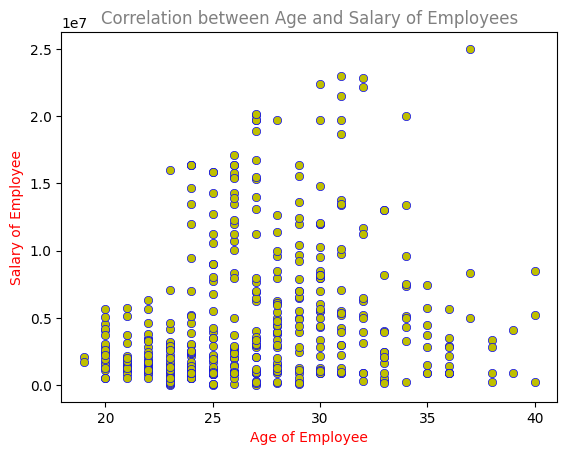

In [68]:
sns.scatterplot(data=df,x='Age',y='Salary',color='y',edgecolor='blue')
plt.title('Correlation between Age and Salary of Employees',color='grey')
plt.xlabel('Age of Employee',color='r')
plt.ylabel('Salary of Employee',color='r')
plt.show()